In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def technological_noise(count_mt, capture_rate = 0.2):
    
    X = count_mt.copy()
    libsize_cell = [np.sum(X[cell,:]) for cell in range(X.shape[0])]

    gene_indices = [[0 for gene in range(libsize_cell[cell])] for cell in range(X.shape[0])]
    sampled_genes = []
    
    for cell_id, gene_idx in enumerate(gene_indices):
        subsample = np.random.uniform(0.0, 1.0, size = len(gene_indices)) > (1-capture_rate)
        sampled_genes.append(subsample)
        idx = 0
        for gene_id, gene_num in enumerate(X[cell_id,:]):
            count = np.sum(subsample[idx:(idx + int(gene_num))])
            X[cell_id, gene_id] = count
            
    return X

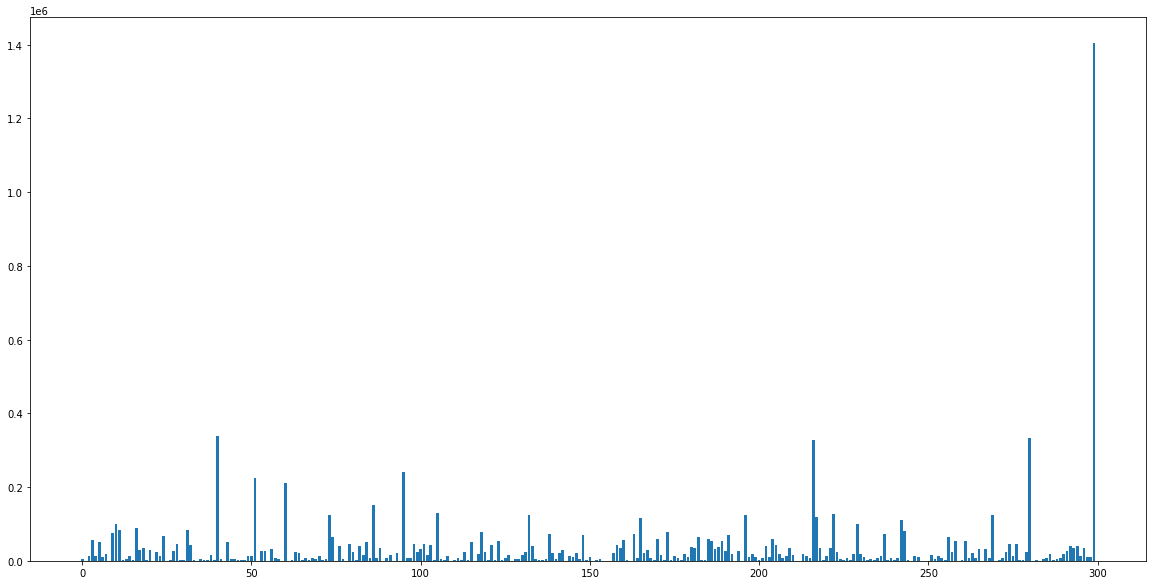

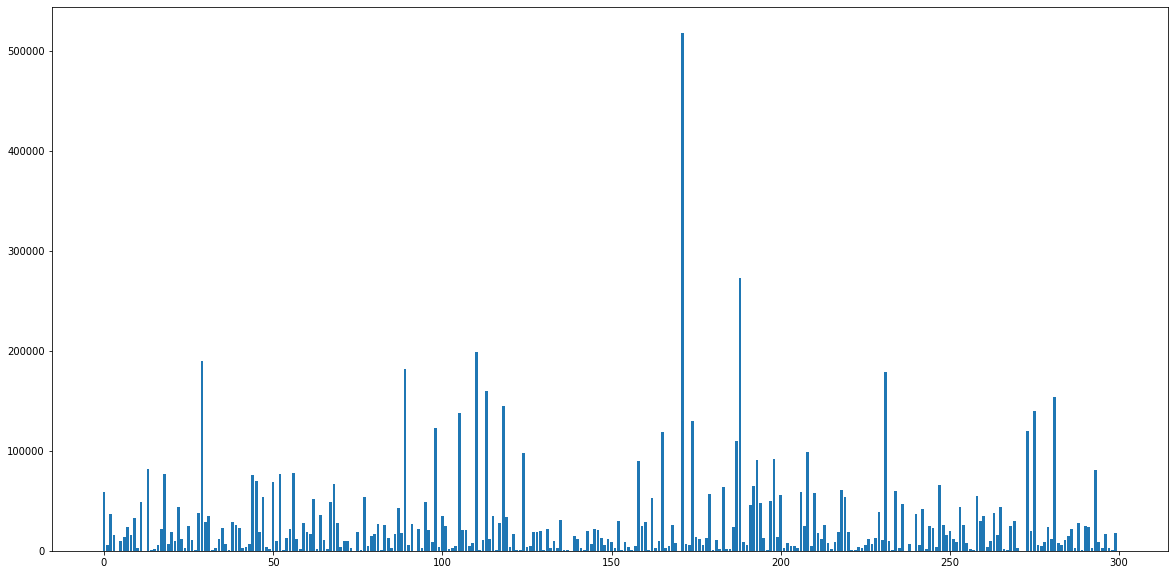

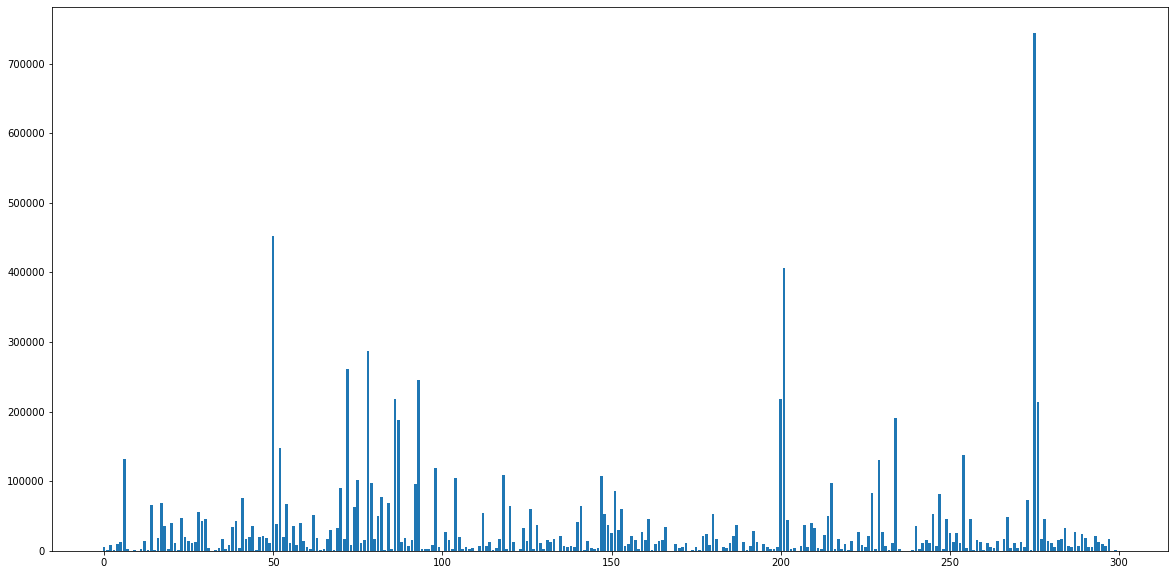

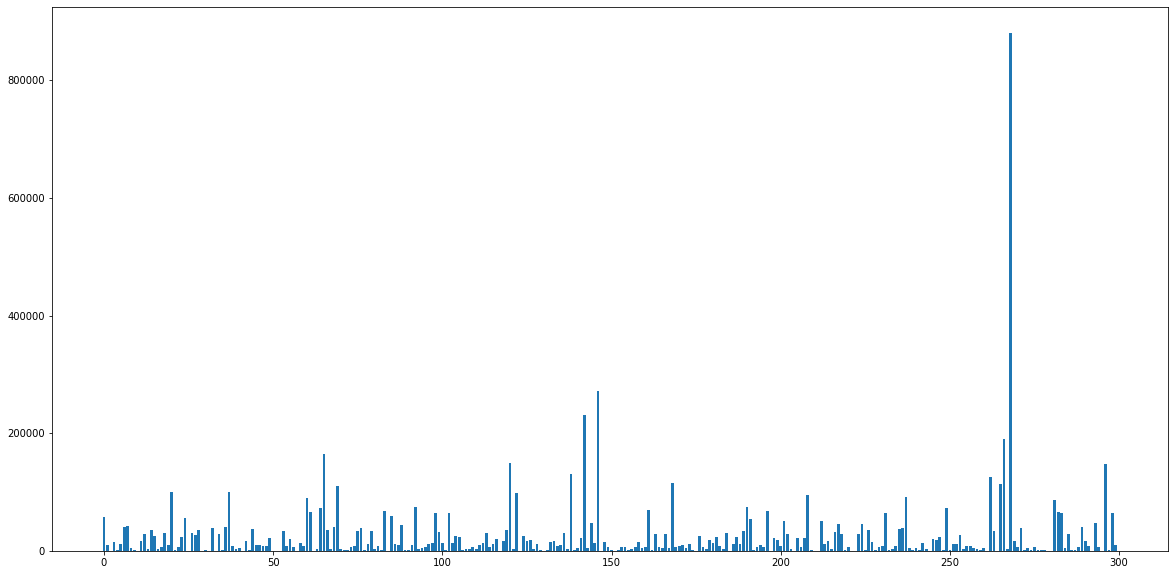

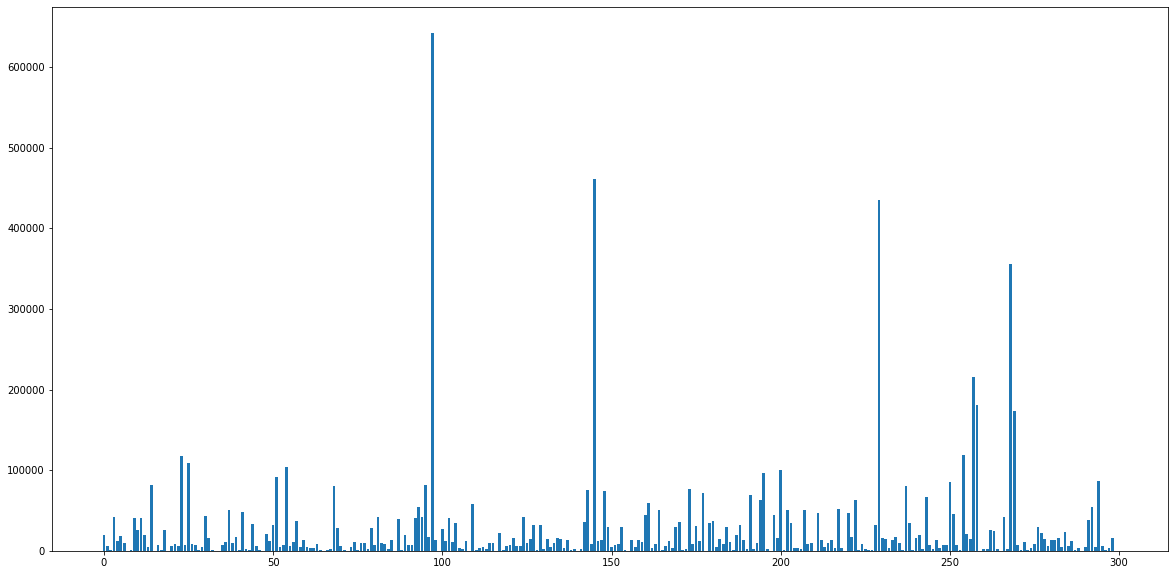

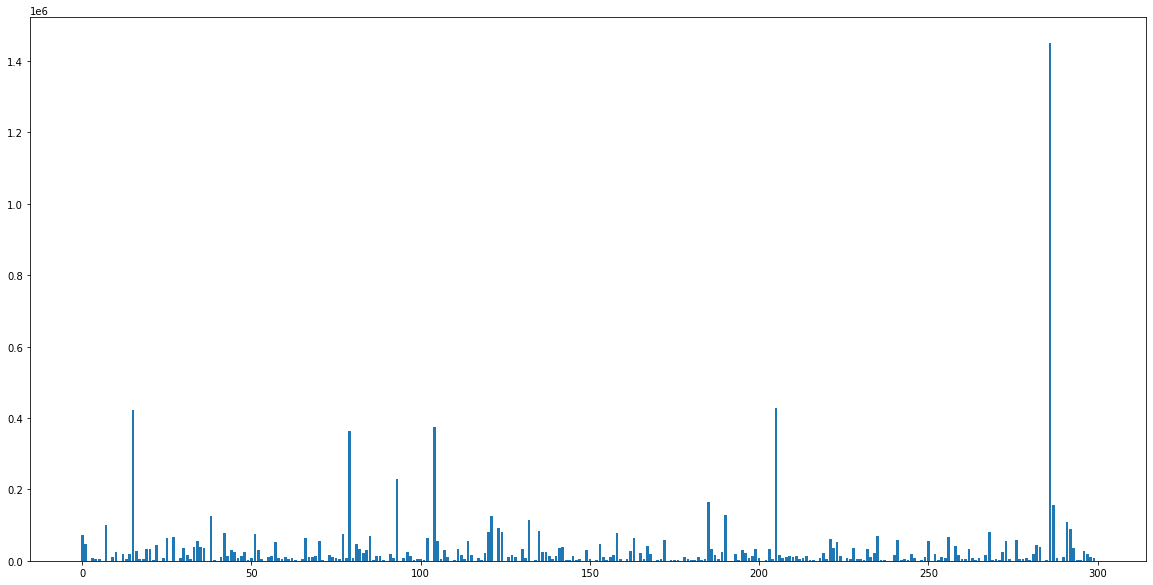

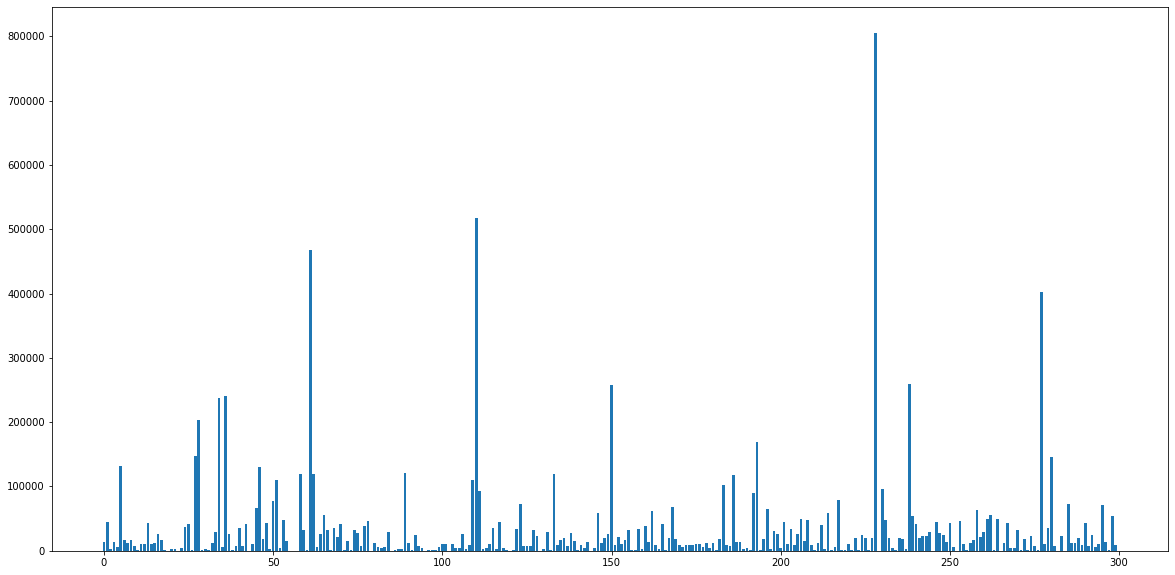

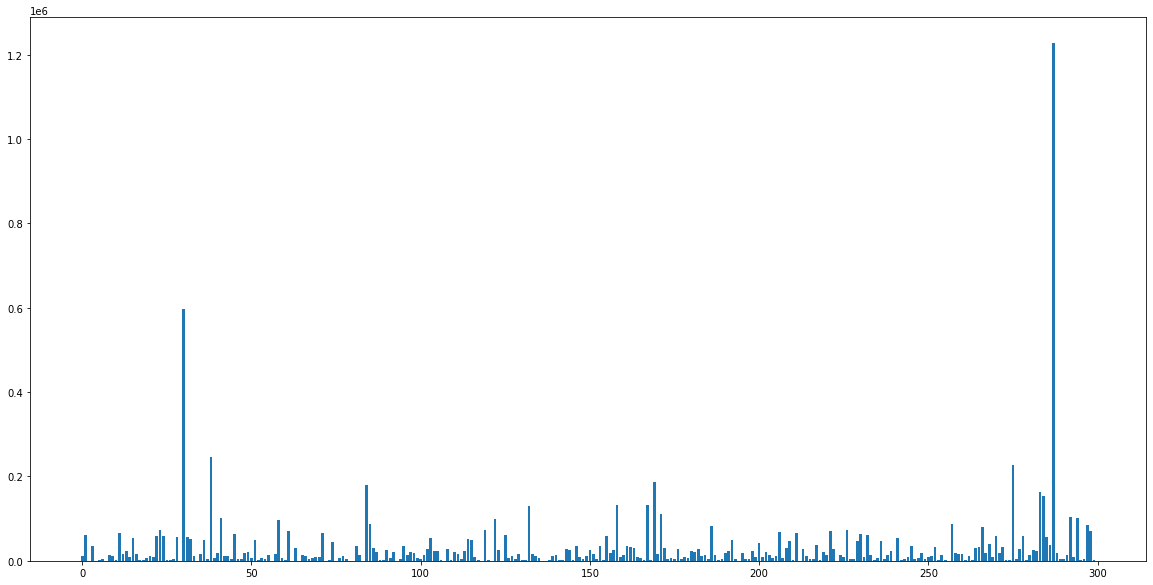

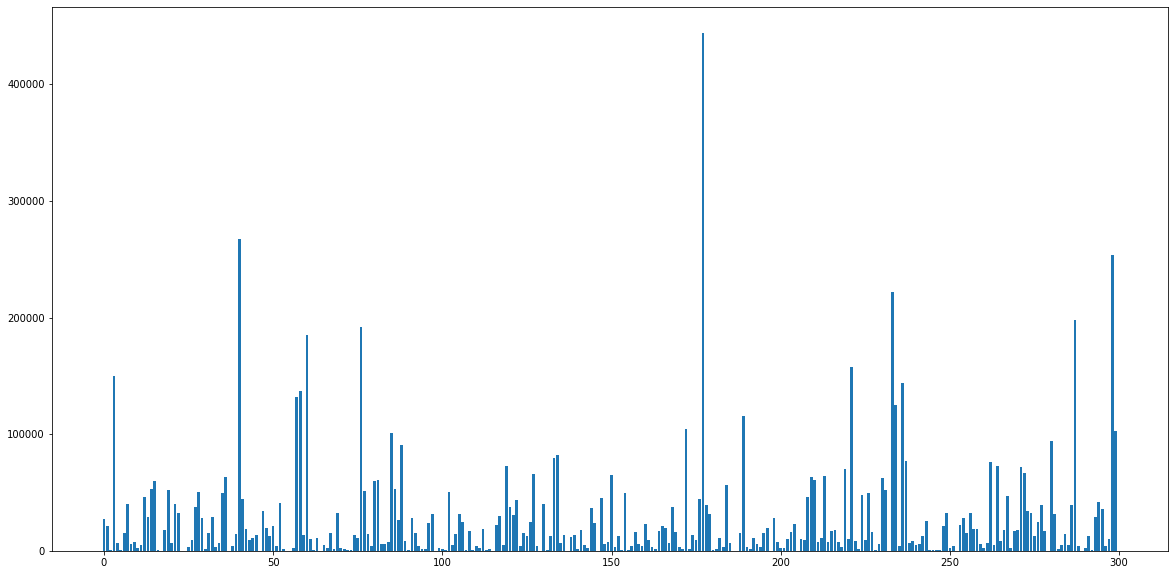

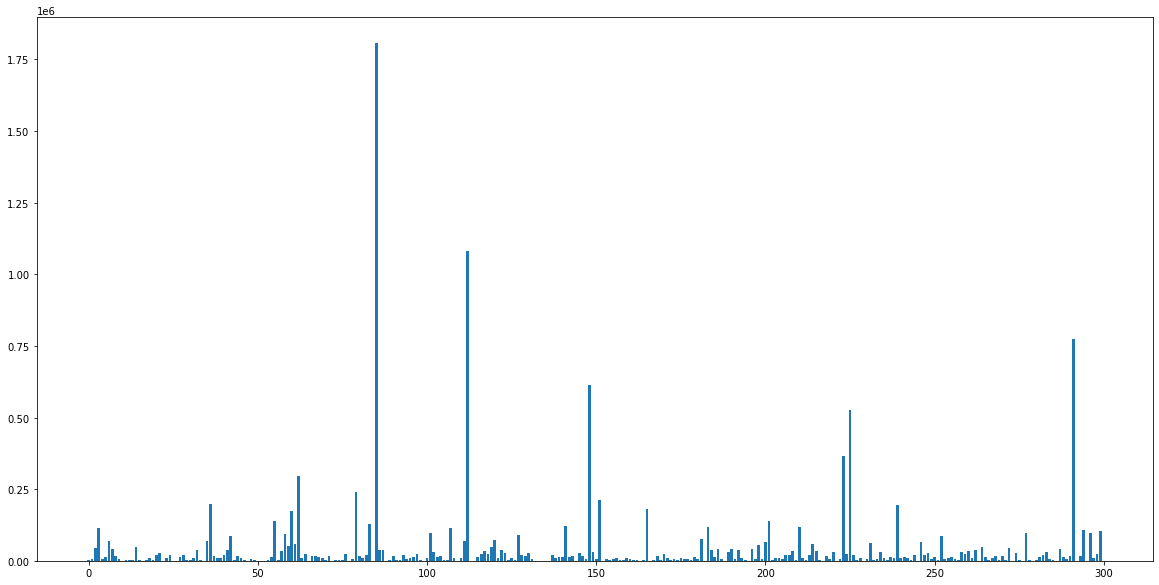

In [5]:
data_list = []
root = "./"
tree_files = ['tree/rand'+str(i)+'/' for i in range(1,11)]

for i, file_name in enumerate(tree_files):
    X_unspliced = pd.read_csv(root + file_name + "unspliced_counts.txt", sep="\t",header=None).to_numpy().T.astype(int)
    X_unspliced2 = technological_noise(X_unspliced)
    

    X_spliced = pd.read_csv(root + file_name + "spliced_counts.txt", sep = "\t",header=None).to_numpy().T.astype(int)
    X_spliced2 = technological_noise(X_spliced)

    gene_count = np.sum(X_spliced, axis = 0)
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot()
    ax.bar(np.arange(len(gene_count)), gene_count)
    fig.savefig(fname = 'rand' + str(i) + '.pdf')


    true_velo = pd.read_csv(root + file_name + "true_velo.txt", sep="\t",header=None).to_numpy().T
    true_time = pd.read_csv(root + file_name + "cell_labels.txt", sep = "\t",lineterminator="\n").to_numpy()
    X_obs = pd.DataFrame(data=true_time, index = ['cell_' + str(x) for x in range(X_unspliced.shape[0])], columns = ['back_bone','sim_time'])
    


In [22]:
np.where(X_unspliced == 6373)

(array([156]), array([299]))

In [25]:
X_spliced[:,299]

array([3540, 4306, 4329, 3805, 3751, 3062, 2428, 2605, 3152, 3994, 3519,
       2656, 2913, 3642, 3635, 3805, 3397, 3433, 3704, 3786, 3271, 3270,
       2602, 2681, 2910, 3202, 3551, 3563, 3709, 3872, 3739, 3809, 4031,
       3558, 3220, 3322, 3373, 3092, 3624, 3795, 3539, 3334, 3026, 3570,
       4227, 4523, 5006, 4997, 4540, 3901, 3575, 3158, 3347, 3462, 3826,
       3870, 3891, 3688, 3428, 3733, 4737, 4654, 3822, 3819, 4280, 4418,
       4357, 4433, 4321, 4116, 4165, 4384, 4449, 4416, 3268, 3195, 3268,
       3518, 3171, 3141, 3122, 3409, 3573, 3543, 3258, 3194, 3115, 3164,
       3384, 3150, 3210, 3550, 3595, 3960, 3728, 3784, 3933, 3255, 3154,
       3263, 3740, 3827, 4139, 4396, 4340, 3871, 3610, 4146, 4180, 4143,
       3507, 3298, 3470, 3528, 3373, 3303, 3507, 3436, 3381, 3647, 3881,
       3535, 3350, 2859, 2686, 2717, 2701, 2470, 2548, 2834, 2806, 2526,
       2448, 2692, 2931, 3052, 2866, 2646, 2567, 2439, 4115, 3897, 4716,
       5424, 5391, 4878, 4890, 4996, 4810, 4817, 42